In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

### Walmart Sales Data

For the independent practice, we will analyze the weekly sales data from Walmart over a two year period from 2010 to 2012.

The data is again separated by store and by department, but we will focus on analyzing one store for simplicity.

The data includes:

- Store - the store number
- Dept - the department number
- Date - the week
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week


#### Loading the data and setting the DateTimeIndex

In [20]:
data = pd.read_csv('../dataset/rossmann.csv', skipinitialspace=True)

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.head()

/Users/linglee/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


#### Filter the dataframe to Store 1 sales and aggregate over departments to compute the total sales per store.

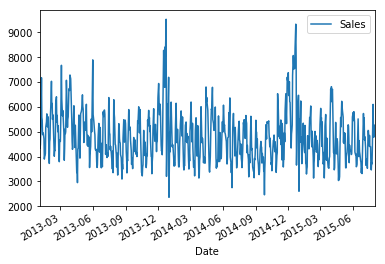

In [21]:
# Filter to store
store1_data = data[data.Store == 1]
# Fileter to open days
store1_open_data = store1_data[store1_data.Open == 1]
#Plot the sales over 
store1_open_data[['Sales']].plot()

#### Plot the rolling_mean for `Weekly_Sales`. What general trends do you observe?

In [29]:
# TODO
print store1_data.Sales.autocorr(lag=1) # -0.12  
print store1_data.Sales.autocorr(lag=2) # -0.03
print store1_data.Sales.autocorr(lag=7) # -0.03



-0.127325143391
-0.0347871557079
0.630719243284


#### Compute the 1, 2, 52 autocorrelations for `Weekly_Sales` and/or create an autocorrelation plot.

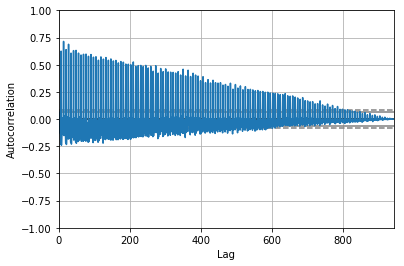

In [23]:
# TODO. This means as the we further go back in time.
%matplotlib inline 
from pandas.tools.plotting import autocorrelation_plot   
autocorrelation_plot(store1_data.Sales)

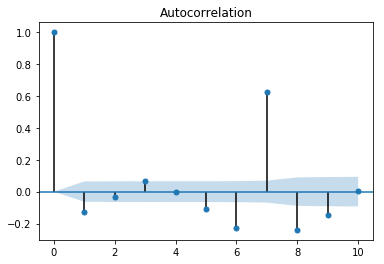

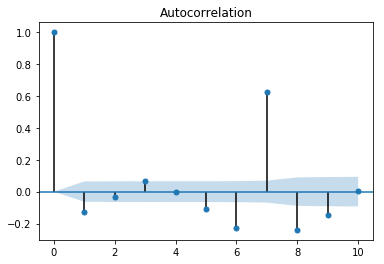

In [33]:
# TODO. 7 is the best
from statsmodels.graphics.tsaplots import plot_acf  
plot_acf(store1_data.Sales, lags=10)

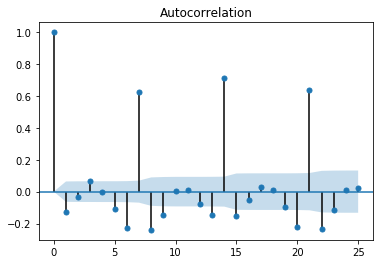

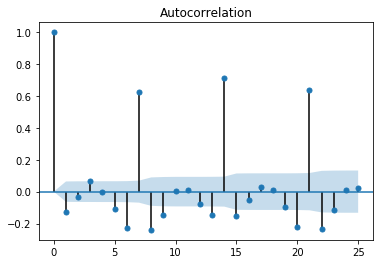

In [34]:
# TODO
plot_acf(store1_data.Sales, lags=25)

In [36]:
from statsmodels.tsa.arima_model import ARMA   
store1_sales_data = store1_open_data[['Sales']].astype(float)  
model = ARMA(store1_sales_data, (1, 0)).fit()  
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(1, 0)   Log Likelihood               -6267.326
Method:                       css-mle   S.D. of innovations            739.079
Date:                Thu, 22 Jun 2017   AIC                          12540.651
Time:                        21:01:32   BIC                          12554.633
Sample:                    07-31-2015   HQIC                         12546.029
                         - 01-02-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4762.6173     82.986     57.391      0.000      4599.969  4925.266
ar.L1.Sales     0.6822      0.026     26.122      0.000         0.631     0.733
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4659           +0.0000j            1.4659            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
Build and AR(1) model. Notice that the coefficient is not the same as the autocorrelation 

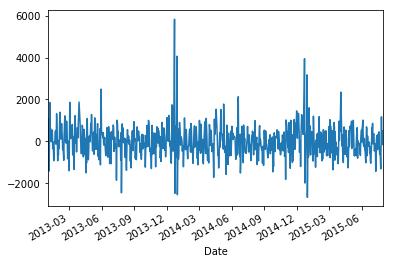

In [37]:
model.resid.plot()

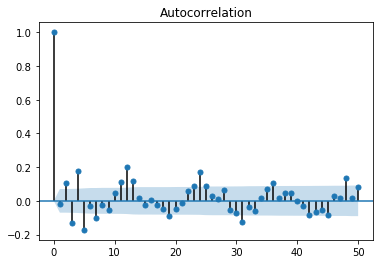

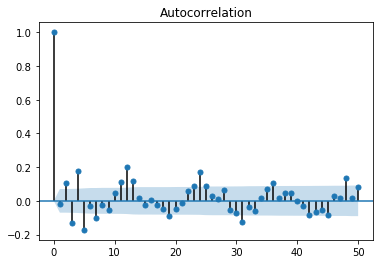

In [38]:
plot_acf(model.resid, lags=50)

In [40]:
model = ARMA(store1_sales_data, (1, 1)).fit()  
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(1, 1)   Log Likelihood               -6267.111
Method:                       css-mle   S.D. of innovations            738.876
Date:                Thu, 22 Jun 2017   AIC                          12542.223
Time:                        21:15:52   BIC                          12560.865
Sample:                    07-31-2015   HQIC                         12549.392
                         - 01-02-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4763.2676     84.704     56.234      0.000      4597.250  4929.285
ar.L1.Sales     0.6979      0.035     20.095      0.000         0.630     0.766
ma.L1.Sales    -0.0294      0.045     -0.653      0.514        -0.118     0.059
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4328           +0.0000j            1.4328            0.0000
MA.1           34.0374           +0.0000j           34.0374            0.0000
-----------------------------------------------------------------------------
"""

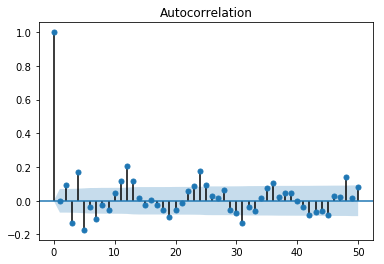

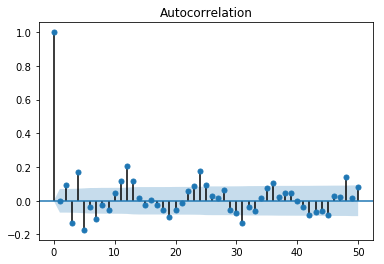

In [41]:
plot_acf(model.resid, lags=50)

In [42]:
from statsmodels.tsa.arima_model import ARIMA   
model = ARIMA(store1_sales_data, (1, 0, 1)).fit()  
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(1, 1)   Log Likelihood               -6267.111
Method:                       css-mle   S.D. of innovations            738.876
Date:                Thu, 22 Jun 2017   AIC                          12542.223
Time:                        21:19:28   BIC                          12560.865
Sample:                    07-31-2015   HQIC                         12549.392
                         - 01-02-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4763.2676     84.704     56.234      0.000      4597.250  4929.285
ar.L1.Sales     0.6979      0.035     20.095      0.000         0.630     0.766
ma.L1.Sales    -0.0294      0.045     -0.653      0.514        -0.118     0.059
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4328           +0.0000j            1.4328            0.0000
MA.1           34.0374           +0.0000j           34.0374            0.0000
-----------------------------------------------------------------------------
"""

In [43]:
model = ARIMA(store1_sales_data, (1, 1, 1)).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  780
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6261.011
Method:                       css-mle   S.D. of innovations            738.624
Date:                Thu, 22 Jun 2017   AIC                          12530.022
Time:                        21:20:44   BIC                          12548.659
Sample:                    07-30-2015   HQIC                         12537.190
                         - 01-02-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.5109      0.364      1.405      0.160        -0.202     1.223
ar.L1.D.Sales     0.6801      0.026     25.801      0.000         0.628     0.732
ma.L1.D.Sales    -1.0000      0.004   -240.409      0.000        -1.008    -0.992
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4703           +0.0000j            1.4703            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [44]:
model = ARIMA(store1_sales_data, (1, 1, 0)).fit() 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  780
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -6313.616
Method:                       css-mle   S.D. of innovations            792.680
Date:                Thu, 22 Jun 2017   AIC                          12633.233
Time:                        21:20:57   BIC                          12647.211
Sample:                    07-30-2015   HQIC                         12638.609
                         - 01-02-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.1765     24.028      0.007      0.994       -46.917    47.270
ar.L1.D.Sales    -0.1815      0.035     -5.150      0.000        -0.251    -0.112
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.5103           +0.0000j            5.5103            0.5000
-----------------------------------------------------------------------------
"""

In [45]:
store1_sales_data.Sales.diff(1).autocorr(1) #-0.181

-0.18144101447610664

/Users/linglee/anaconda/lib/python2.7/site-packages/statsmodels/tsa/arima_model.py:1847: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


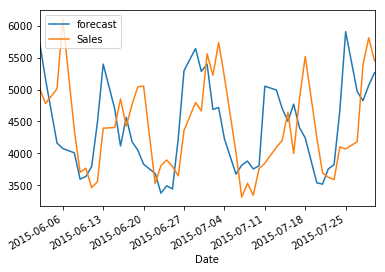

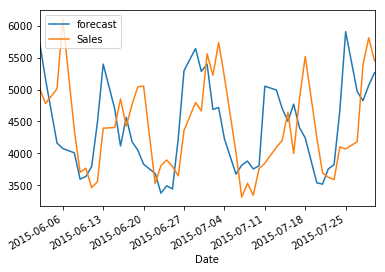

In [47]:
model.plot_predict(1, 50)


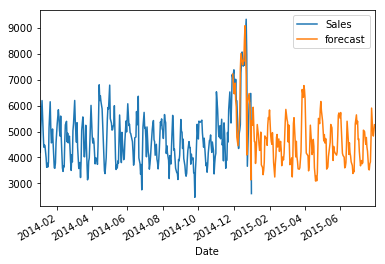

In [49]:
import matplotlib.pyplot as plt 
 
fig, ax = plt.subplots() 
ax = store1_sales_data['2014'].plot(ax=ax) 
 
fig = model.plot_predict(1, 200, ax=ax, plot_insample=False)

#### Split the weekly sales data in a training and test set - using 75% of the data for training

In [ ]:
# TODO

#### Create an AR(1) model on the training data and compute the mean absolute error of the predictions.

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [ ]:
# TODO

#### Plot the residuals - where are their significant errors.

In [ ]:
# TODO

In [ ]:
# TODO

#### Compute and AR(2) model and an ARMA(2, 2) model - does this improve your mean absolute error on the held out set.

In [ ]:
# TODO

In [ ]:
# TODO

#### Finally, compute an ARIMA model to improve your prediction error - iterate on the p, q, and parameters comparing the model's performance.

In [ ]:
# TODO